In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
stop_path = '/content/drive/MyDrive/Y3S1/CI projct/Berhenti/'
bump_path = '/content/drive/MyDrive/Y3S1/CI projct/Bumps/'
diverge_path = '/content/drive/MyDrive/Y3S1/CI projct/Diverge/'
warning_path = '/content/drive/MyDrive/Y3S1/CI projct/Obstruction(Warning)/'

In [5]:
x_data = []
y_label = []

height = 224
width = 224

print("Start to collect data")

for filename in os.listdir(stop_path):
  img = cv2.imread(stop_path+filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (width,height), fx = 0.75, fy = 0.75)
  x_data.append(img.flatten())
  y_label.append(0)

print("Stops done")

for filename in os.listdir(bump_path):
  img = cv2.imread(bump_path+filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (width,height), fx = 0.75, fy = 0.75)
  x_data.append(img.flatten())
  y_label.append(1)
  
print("Bump done")

for filename in os.listdir(diverge_path):
  img = cv2.imread(diverge_path+filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (width,height), fx = 0.75, fy = 0.75)
  x_data.append(img.flatten())
  y_label.append(2)

print("diverge done")

for filename in os.listdir(warning_path):
  img = cv2.imread(warning_path+filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (width,height), fx = 0.75, fy = 0.75)
  x_data.append(img.flatten())
  y_label.append(3)

x_data = np.array(x_data)
y_label = np.array(y_label)

print("All done")

print(x_data.shape)
print(y_label.shape)

Start to collect data
Stops done
Bump done
diverge done
All done
(2213, 150528)
(2213,)


In [6]:
print(y_label)

[0 0 0 ... 3 3 3]


In [7]:
# To split data into training set and testing set
from sklearn.model_selection import train_test_split

# x is for features, y is for label
X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_label,
                                                    test_size=0.3,
                                                    random_state=0)

In [8]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1549, 150528)
y_train shape: (1549,)
X_test shape: (664, 150528)
y_test shape: (664,)


In [9]:
unique, counts = np.unique(y_label, return_counts=True)
dict(zip(unique, counts))

{0: 570, 1: 521, 2: 609, 3: 513}

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.75,
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

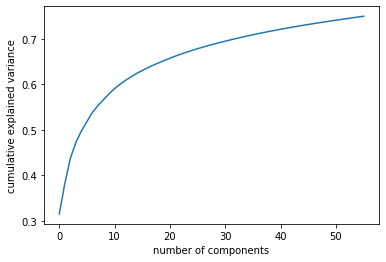

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [29]:
from sklearn.neural_network import MLPClassifier

clf_pca = MLPClassifier(hidden_layer_sizes=(200,200,150,100),
                    random_state=10,
                    verbose=True,
                    learning_rate_init=0.01,
                    max_iter = 250)

# Fit data onto the model
clf_pca.fit(X_train_pca,y_train)

Iteration 1, loss = 1.23921337
Iteration 2, loss = 0.41131901
Iteration 3, loss = 0.17751974
Iteration 4, loss = 0.12294096
Iteration 5, loss = 0.06980323
Iteration 6, loss = 0.03508547
Iteration 7, loss = 0.01438797
Iteration 8, loss = 0.00780404
Iteration 9, loss = 0.00543750
Iteration 10, loss = 0.00307677
Iteration 11, loss = 0.00680617
Iteration 12, loss = 0.00795855
Iteration 13, loss = 0.04902788
Iteration 14, loss = 0.08088850
Iteration 15, loss = 0.07968977
Iteration 16, loss = 0.05114555
Iteration 17, loss = 0.02304561
Iteration 18, loss = 0.01245916
Iteration 19, loss = 0.01150276
Iteration 20, loss = 0.02062813
Iteration 21, loss = 0.01376349
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(200, 200, 150, 100), learning_rate_init=0.01,
              max_iter=250, random_state=10, verbose=True)

In [30]:
ypred=clf_pca.predict(X_test_pca)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracys
accuracy_score(y_test,ypred)

0.911144578313253

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred, labels=clf_pca.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       178
           1       0.83      0.89      0.86       154
           2       0.95      0.90      0.93       188
           3       0.86      0.85      0.85       144

    accuracy                           0.91       664
   macro avg       0.91      0.91      0.91       664
weighted avg       0.91      0.91      0.91       664



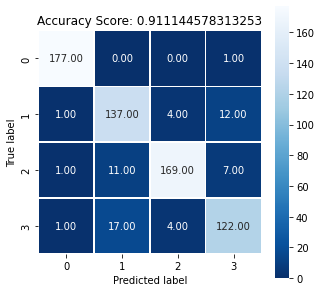

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred)

plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt='.2f',
           linewidth=0.5, square=True, cmap='Blues_r')

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Accuracy Score: {0}".format(accuracy_score(y_test, ypred)))
plt.show()